In [69]:
import copy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [58]:
blobs2 = pd.read_csv("../datasets/blobs2.csv")
blobs2_l = blobs2["label"] * 2 - 1
blobs2_f = blobs2.drop("label", axis=1)

In [81]:
class Perceptron:
    def __init__(self):
        pass
        
    def fit(self, X, y, iters=10):
        self.dim = X.shape[1] + 1
        self.weights = np.random.rand(self.dim)
        X1 = np.hstack((X, np.ones((X.shape[0], 1))))
        best_weights = self.weights
        for it in range(iters):
            best_err_count = np.sum(self.predict1(X1) != y)
            iter_err_count = best_err_count
            for i, x in enumerate(X1):
                if self.predict1(x) != y.iloc[i]:
                    self.weights += y.iloc[i] * x
                    new_err_count = np.sum(self.predict1(X1) != y)
                    if new_err_count < best_err_count:
                        best_err_count = new_err_count
                        best_weights = copy.deepcopy(self.weights)
            if iter_err_count <= best_err_count:
                self.weights = best_weights
                return self
                
    def predict_proba1(self, X):
        return X @ self.weights
            
    def predict_proba(self, X):
        return self.predict_proba1(np.hstack((X, np.ones((X.shape[0], 1)))))
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0) * 2 - 1
    
    def predict1(self, X):
        return (self.predict_proba1(X) >= 0) * 2 - 1

In [107]:
def acc_on_perceptron(X, y):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75)
    model = Perceptron()
    model.fit(X_tr, y_tr, iters=20)
    print("Train:", (model.predict(X_tr) == y_tr).mean())
    print("Test:", (model.predict(X_te) == y_te).mean())
    def draw(X_p, y_p):
        plt.scatter(X_p[y_p == 1]["x"], X_p[y_p == 1]["y"], c='g')
        plt.scatter(X_p[y_p == -1]["x"], X_p[y_p == -1]["y"], c='b')
        x = np.linspace(np.min(X_p["x"]), np.max(X_p["x"]), 100)
        y = -(model.weights[0] * x + model.weights[2]) / model.weights[1]
        plt.plot(x, y, '-r', label='y=2x+1')
        plt.show()
    draw(X_tr, y_tr)
    draw(X_te, y_te)

Train: 0.988
Test: 0.976


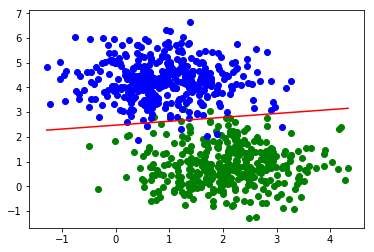

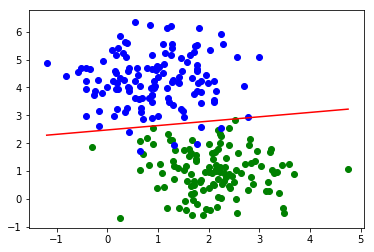

In [108]:
acc_on_perceptron(blobs2_f, blobs2_l)

In [110]:
def add_polinomial(X, deg=2):
    X_p = copy.deepcopy(X)
    for d in range(2, deg + 1):
        for i in range(d + 1):
            X_p[f"x{i}y{d-i}"] = X["x"] ** i * X["y"] ** (d-i)
    return X_p

In [113]:
blobs2_f2 = add_polinomial(blobs2_f, deg=2)
blobs2_f3 = add_polinomial(blobs2_f, deg=3)
blobs2_f4 = add_polinomial(blobs2_f, deg=4)

In [130]:
np.reshape(np.ones(3), (-1, 1)) @ np.reshape(np.ones(3), (1, -1))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [183]:
from mpl_toolkits.mplot3d import Axes3D

def acc_on_perceptron_poly(X, y, deg=1, eps=0.3):
    X_p = copy.deepcopy(X)
    for d in range(2, deg + 1):
        for i in range(d + 1):
            X_p[f"x{i}y{d-i}"] = X["x"] ** i * X["y"] ** (d-i)
    X_tr, X_te, y_tr, y_te = train_test_split(X_p, y, train_size=0.75)
    model = Perceptron()
    model.fit(X_tr, y_tr, iters=20)
    print("Train:", (model.predict(X_tr) == y_tr).mean())
    print("Test:", (model.predict(X_te) == y_te).mean())
    def draw(X_p, y_p):
        fig = plt.figure()
#         ax = fig.gca(projection='3d')
        plt.scatter(X_p[y_p == 1]["x"], X_p[y_p == 1]["y"], c='g')
        plt.scatter(X_p[y_p == -1]["x"], X_p[y_p == -1]["y"], c='b')
        n = 1000
        x = np.linspace(np.min(X_p["x"]), np.max(X_p["x"]), n)
        y = np.linspace(np.min(X_p["y"]), np.max(X_p["y"]), n)
        xx, yy = np.meshgrid(x, y)
        ind = 0
        z = np.zeros((n, n))
        for d in range(1, deg + 1):
            for i in range(d + 1):
                z += model.weights[ind] * np.reshape(x ** i, (-1, 1)) @ np.reshape(y ** (d-i), (1, -1))
#                 z += model.weights[ind] * (xx ** i) * (y ** (d-i))
                ind += 1
        z += model.weights[-1]
        xx, yy = [], []
        for i in range(z.shape[0]):
            for j in range(z.shape[1]):
                if abs(z[i, j]) < eps:
                    xx.append(x[i])
                    yy.append(y[j])

        
        plt.scatter(xx, yy, c='r', s=2)
#         ax.plot_surface(xx, yy, z)
        plt.show()
        
    draw(X_tr, y_tr)
    draw(X_te, y_te)

Train: 0.98
Test: 0.984


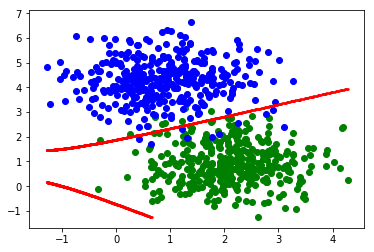

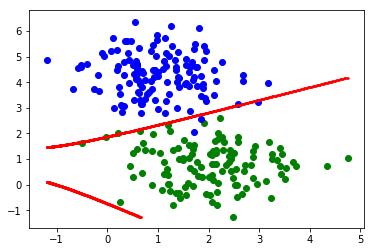

In [186]:
acc_on_perceptron_poly(blobs2_f, blobs2_l, deg=2, eps=0.3)

Train: 0.9813333333333333
Test: 0.976


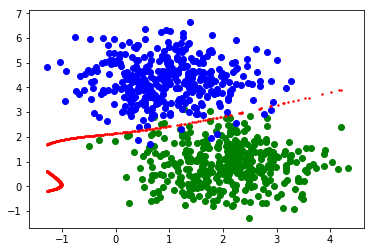

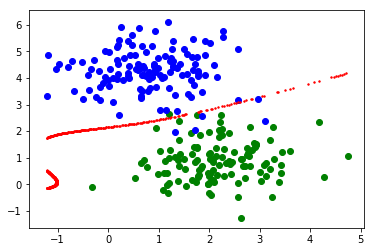

In [184]:
acc_on_perceptron_poly(blobs2_f, blobs2_l, deg=3, eps=0.5)

Train: 0.9813333333333333
Test: 0.98


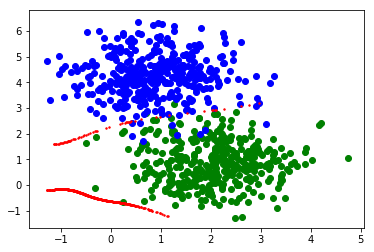

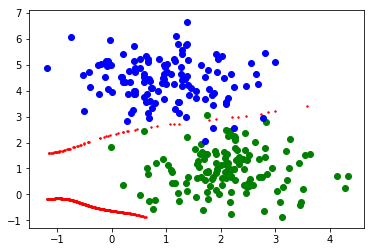

In [191]:
acc_on_perceptron_poly(blobs2_f, blobs2_l, deg=4, eps=2)